In [5]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
  
# defining the canny detector function
   
# double thresholding step
def Canny_detector(img, weak_th = None, strong_th = None):
    
      
    # conversion of image to grayscale
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
       
    # Noise reduction step
    img = cv2.GaussianBlur(img, (7, 7), 1.4)
       
    # Calculating the gradients
    gx = cv2.Sobel(np.float32(img), cv2.CV_64F, 1, 0, 3)
    gy = cv2.Sobel(np.float32(img), cv2.CV_64F, 0, 1, 3)

    mag, ang = cv2.cartToPolar(gx, gy, angleInDegrees = True)
       
    mag_max = np.max(mag)
    if not weak_th:weak_th = mag_max * 0.1
    if not strong_th:strong_th = mag_max * 0.5
      
    height, width = img.shape
       
    for i_x in range(width):
        for i_y in range(height):
               
            grad_ang = ang[i_y, i_x]
            grad_ang = abs(grad_ang-180) if abs(grad_ang)>180 else abs(grad_ang)
               
            if grad_ang<= 22.5:
                neighb_1_x, neighb_1_y = i_x-1, i_y
                neighb_2_x, neighb_2_y = i_x + 1, i_y
            elif grad_ang>22.5 and grad_ang<=(22.5 + 45):
                neighb_1_x, neighb_1_y = i_x-1, i_y-1
                neighb_2_x, neighb_2_y = i_x + 1, i_y + 1
            elif grad_ang>(22.5 + 45) and grad_ang<=(22.5 + 90):
                neighb_1_x, neighb_1_y = i_x, i_y-1
                neighb_2_x, neighb_2_y = i_x, i_y + 1
            elif grad_ang>(22.5 + 90) and grad_ang<=(22.5 + 135):
                neighb_1_x, neighb_1_y = i_x-1, i_y + 1
                neighb_2_x, neighb_2_y = i_x + 1, i_y-1
            elif grad_ang>(22.5 + 135) and grad_ang<=(22.5 + 180):
                neighb_1_x, neighb_1_y = i_x-1, i_y
                neighb_2_x, neighb_2_y = i_x + 1, i_y
            if width>neighb_1_x>= 0 and height>neighb_1_y>= 0:
                if mag[i_y, i_x]<mag[neighb_1_y, neighb_1_x]:
                    mag[i_y, i_x]= 0
                    continue
   
            if width>neighb_2_x>= 0 and height>neighb_2_y>= 0:
                if mag[i_y, i_x]<mag[neighb_2_y, neighb_2_x]:
                    mag[i_y, i_x]= 0
   
    weak_ids = np.zeros_like(img)
    strong_ids = np.zeros_like(img)              
    ids = np.zeros_like(img)
       
    # double thresholding step
    for i_x in range(width):
        for i_y in range(height):
              
            grad_mag = mag[i_y, i_x]
              
            if grad_mag<weak_th:
                mag[i_y, i_x]= 0
            elif strong_th>grad_mag>= weak_th:
                ids[i_y, i_x]= 1
            else:
                ids[i_y, i_x]= 2
       
       
    return mag
   


In [6]:

frame = cv2.imread('messi.jpg')

# calling the designed function for
# finding edges
canny_img = Canny_detector(frame)
   
# Displaying the input and output image  
plt.figure()
f, plots = plt.subplots(2, 1) 
plots[0].imshow(frame)
plots[1].imshow(canny_img)
os.chdir('F:/input')
cv2.imwrite('imagetest.jpg',canny_img)

error: OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-vi271kac\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [2]:
os.chdir('F:/input/ham10000_images_part_1')
image_list=os.listdir()
print(image_list)
for i in image_list:
    print(i)
    
    frame = cv2.imread(i)

    # calling the designed function for
    # finding edges
    canny_img = Canny_detector(frame)

    # Displaying the input and output image  
     
    filename='F:/input/ham10000_images_cannyedge_part1/'+i
    cv2.imwrite(filename,canny_img)
    

['ISIC_0024306.jpg', 'ISIC_0024307.jpg', 'ISIC_0024308.jpg', 'ISIC_0024309.jpg', 'ISIC_0024310.jpg', 'ISIC_0024311.jpg', 'ISIC_0024312.jpg', 'ISIC_0024313.jpg', 'ISIC_0024314.jpg', 'ISIC_0024315.jpg', 'ISIC_0024316.jpg', 'ISIC_0024317.jpg', 'ISIC_0024318.jpg', 'ISIC_0024319.jpg', 'ISIC_0024320.jpg', 'ISIC_0024321.jpg', 'ISIC_0024322.jpg', 'ISIC_0024323.jpg', 'ISIC_0024324.jpg', 'ISIC_0024325.jpg', 'ISIC_0024326.jpg', 'ISIC_0024327.jpg', 'ISIC_0024328.jpg', 'ISIC_0024329.jpg', 'ISIC_0024330.jpg', 'ISIC_0024331.jpg', 'ISIC_0024332.jpg', 'ISIC_0024333.jpg', 'ISIC_0024334.jpg', 'ISIC_0024335.jpg', 'ISIC_0024336.jpg', 'ISIC_0024337.jpg', 'ISIC_0024338.jpg', 'ISIC_0024339.jpg', 'ISIC_0024340.jpg', 'ISIC_0024341.jpg', 'ISIC_0024342.jpg', 'ISIC_0024343.jpg', 'ISIC_0024344.jpg', 'ISIC_0024345.jpg', 'ISIC_0024346.jpg', 'ISIC_0024347.jpg', 'ISIC_0024348.jpg', 'ISIC_0024349.jpg', 'ISIC_0024350.jpg', 'ISIC_0024351.jpg', 'ISIC_0024352.jpg', 'ISIC_0024353.jpg', 'ISIC_0024354.jpg', 'ISIC_0024355.jpg',

NameError: name 'cv2' is not defined

In [27]:
os.chdir('F:/input/ham10000_images_part_2')
image_list=os.listdir()
print(image_list)
for i in image_list:
    print(i)
    
    frame = cv2.imread(i)

    # calling the designed function for
    # finding edges
    canny_img = Canny_detector(frame)

    # Displaying the input and output image  
     
    filename='F:/input/ham10000_images_cannyedge_part2/'+i
    cv2.imwrite(filename,canny_img)
    

['ISIC_0029306.jpg', 'ISIC_0029307.jpg', 'ISIC_0029308.jpg', 'ISIC_0029309.jpg', 'ISIC_0029310.jpg', 'ISIC_0029311.jpg', 'ISIC_0029312.jpg', 'ISIC_0029313.jpg', 'ISIC_0029314.jpg', 'ISIC_0029315.jpg', 'ISIC_0029316.jpg', 'ISIC_0029317.jpg', 'ISIC_0029318.jpg', 'ISIC_0029319.jpg', 'ISIC_0029320.jpg', 'ISIC_0029321.jpg', 'ISIC_0029322.jpg', 'ISIC_0029323.jpg', 'ISIC_0029324.jpg', 'ISIC_0029325.jpg', 'ISIC_0029326.jpg', 'ISIC_0029327.jpg', 'ISIC_0029328.jpg', 'ISIC_0029329.jpg', 'ISIC_0029330.jpg', 'ISIC_0029331.jpg', 'ISIC_0029332.jpg', 'ISIC_0029333.jpg', 'ISIC_0029334.jpg', 'ISIC_0029335.jpg', 'ISIC_0029336.jpg', 'ISIC_0029337.jpg', 'ISIC_0029338.jpg', 'ISIC_0029339.jpg', 'ISIC_0029340.jpg', 'ISIC_0029341.jpg', 'ISIC_0029342.jpg', 'ISIC_0029343.jpg', 'ISIC_0029344.jpg', 'ISIC_0029345.jpg', 'ISIC_0029346.jpg', 'ISIC_0029347.jpg', 'ISIC_0029348.jpg', 'ISIC_0029349.jpg', 'ISIC_0029350.jpg', 'ISIC_0029351.jpg', 'ISIC_0029352.jpg', 'ISIC_0029353.jpg', 'ISIC_0029354.jpg', 'ISIC_0029355.jpg',

In [5]:
import tensorflow as tf
from numpy.random import seed
seed(101)

tf.random.set_seed(101)

import pandas as pd
import numpy as np
#import keras
#from keras import backend as K

import tensorflow
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

import os

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import itertools
import shutil
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
os.chdir('F:/')
os.getcwd()

'F:\\'

In [7]:
df_data = pd.read_csv('../input/HAM10000_metadata.csv')

df_data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [8]:
df = df_data.groupby('lesion_id').count()

# now we filter out lesion_id's that have only one image associated with it
df = df[df['image_id'] == 1]

df.reset_index(inplace=True)

df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000001,1,1,1,1,1,1
1,HAM_0000003,1,1,1,1,1,1
2,HAM_0000004,1,1,1,1,1,1
3,HAM_0000007,1,1,1,1,1,1
4,HAM_0000008,1,1,1,1,1,1


In [9]:

def identify_duplicates(x):
    
    unique_list = list(df['lesion_id'])
    
    if x in unique_list:
        return 'no_duplicates'
    else:
        return 'has_duplicates'
    
# create a new colum that is a copy of the lesion_id column
df_data['duplicates'] = df_data['lesion_id']
# apply the function to this new column
df_data['duplicates'] = df_data['duplicates'].apply(identify_duplicates)

df_data.head()


,lesion_id,image_id,dx,dx_type,age,sex,localization,duplicates
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,has_duplicates
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,has_duplicates
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,has_duplicates
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,has_duplicates
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,has_duplicates


In [10]:
df_data['duplicates'].value_counts()

no_duplicates     5514
has_duplicates    4501
Name: duplicates, dtype: int64

In [11]:
# now we filter out images that don't have duplicates
df = df_data[df_data['duplicates'] == 'no_duplicates']

df.shape

(5514, 8)

In [12]:
# now we create a val set using df because we are sure that none of these images
# have augmented duplicates in the train set
y = df['dx']

_, df_val = train_test_split(df, test_size=0.17, random_state=101, stratify=y)

df_val.shape

(938, 8)

In [13]:
df_val['dx'].value_counts()

nv       751
bkl       75
mel       39
bcc       30
akiec     26
vasc      11
df         6
Name: dx, dtype: int64

In [14]:
def identify_val_rows(x):
    # create a list of all the lesion_id's in the val set
    val_list = list(df_val['image_id'])
    
    if str(x) in val_list:
        return 'val'
    else:
        return 'train'

df_data['train_or_val'] = df_data['image_id']
df_data['train_or_val'] = df_data['train_or_val'].apply(identify_val_rows)
   
# filter out train rows
df_train = df_data[df_data['train_or_val'] == 'train']


print(len(df_train))
print(len(df_val))

9077
938


In [15]:
df_train['dx'].value_counts()

nv       5954
mel      1074
bkl      1024
bcc       484
akiec     301
vasc      131
df        109
Name: dx, dtype: int64

In [16]:
df_val['dx'].value_counts()

nv       751
bkl       75
mel       39
bcc       30
akiec     26
vasc      11
df         6
Name: dx, dtype: int64

In [17]:
# Set the image_id as the index in df_data
df_data.set_index('image_id', inplace=True)

In [19]:
# Create a new directory
base_dir = 'F:/input/base_dir2'



# train_dir
    # nv
    # mel
    # bkl
    # bcc
    # akiec
    # vasc
    # df
 

    # nv
    # mel
    # bkl
    # bcc
    # akiec
    # vasc
    # df

# train_dir
train_dir = os.path.join(base_dir, 'train_dir')


# val_dir
val_dir = os.path.join(base_dir, 'val_dir')




# create new folders inside train_dir
nv = os.path.join(train_dir, 'nv')

mel = os.path.join(train_dir, 'mel')

bkl = os.path.join(train_dir, 'bkl')

bcc = os.path.join(train_dir, 'bcc')

akiec = os.path.join(train_dir, 'akiec')

vasc = os.path.join(train_dir, 'vasc')

df = os.path.join(train_dir, 'df')




# create new folders inside val_dir
nv = os.path.join(val_dir, 'nv')

mel = os.path.join(val_dir, 'mel')

bkl = os.path.join(val_dir, 'bkl')

bcc = os.path.join(val_dir, 'bcc')

akiec = os.path.join(val_dir, 'akiec')

vasc = os.path.join(val_dir, 'vasc')

df = os.path.join(val_dir, 'df')


In [20]:
os.chdir('F:/input')

In [52]:
folder_1 = os.listdir('../input/ham10000_images_cannyedge_part1')
folder_2 = os.listdir('../input/ham10000_images_cannyedge_part2')

train_list = list(df_train['image_id'])
val_list = list(df_val['image_id'])



# Transfer the train images

for image in train_list:
    
    fname = image + '.jpg'
    label = df_data.loc[image,'dx']
    
    if fname in folder_1:
        src = os.path.join('../input/ham10000_images_cannyedge_part1', fname)
        dst = os.path.join(train_dir, label, fname)
        shutil.copyfile(src, dst)

    if fname in folder_2:
        src = os.path.join('../input/ham10000_images_cannyedge_part2', fname)
        dst = os.path.join(train_dir, label, fname)
        shutil.copyfile(src, dst)


# Transfer the val images

for image in val_list:
    
    fname = image + '.jpg'
    label = df_data.loc[image,'dx']
    
    if fname in folder_1:
        src = os.path.join('../input/ham10000_images_cannyedge_part1', fname)
        dst = os.path.join(val_dir, label, fname)
        shutil.copyfile(src, dst)

    if fname in folder_2:
        src = os.path.join('../input/ham10000_images_cannyedge_part2', fname)
        dst = os.path.join(val_dir, label, fname)
        shutil.copyfile(src, dst)

In [53]:
# check how many train images we have in each folder

print(len(os.listdir('base_dir2/train_dir/nv')))
print(len(os.listdir('base_dir2/train_dir/mel')))
print(len(os.listdir('base_dir2/train_dir/bkl')))
print(len(os.listdir('base_dir2/train_dir/bcc')))
print(len(os.listdir('base_dir2/train_dir/akiec')))
print(len(os.listdir('base_dir2/train_dir/vasc')))
print(len(os.listdir('base_dir2/train_dir/df')))

5954
1074
1024
484
301
131
109


In [54]:

class_list = ['mel','bkl','bcc','akiec','vasc','df']

for item in class_list:
    
    aug_dir = 'aug_dir'
    os.mkdir(aug_dir)
    img_dir = os.path.join(aug_dir, 'img_dir')
    os.mkdir(img_dir)

    img_class = item

    img_list = os.listdir('base_dir2/train_dir/' + img_class)
    for fname in img_list:
            # source path to image
            src = os.path.join('base_dir2/train_dir/' + img_class, fname)
            # destination path to image
            dst = os.path.join(img_dir, fname)
            # copy the image from the source to the destination
            shutil.copyfile(src, dst)


    # point to a dir containing the images and not to the images themselves
    path = aug_dir
    save_path = 'base_dir2/train_dir/' + img_class

    # Create a data generator
    datagen = ImageDataGenerator(
        rotation_range=180,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        vertical_flip=True,
        #brightness_range=(0.9,1.1),
        fill_mode='nearest')

    batch_size = 50

    aug_datagen = datagen.flow_from_directory(path,
                                           save_to_dir=save_path,
                                           save_format='jpg',
                                                    target_size=(224,224),
                                                    batch_size=batch_size)



    # Generate the augmented images and add them to the training folders
    
    ###########
    
    num_aug_images_wanted = 6000 # total number of images we want to have in each class
    
    ###########
    
    num_files = len(os.listdir(img_dir))
    num_batches = int(np.ceil((num_aug_images_wanted-num_files)/batch_size))

    # run the generator and create about 6000 augmented images
    for i in range(0,num_batches):

        imgs, labels = next(aug_datagen)
    shutil.rmtree('aug_dir')


Found 1074 images belonging to 1 classes.
Found 1024 images belonging to 1 classes.
Found 484 images belonging to 1 classes.
Found 301 images belonging to 1 classes.
Found 131 images belonging to 1 classes.
Found 109 images belonging to 1 classes.


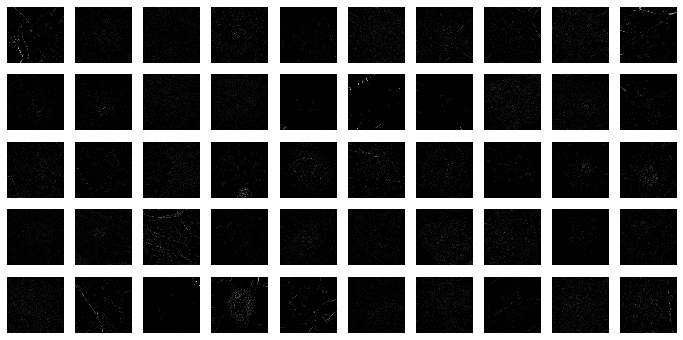

In [55]:

def plots(ims, figsize=(12,6), rows=5, interp=False, titles=None): # 12,6
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')
        
plots(imgs, titles=None) # titles=labels will display the image labels

In [21]:
train_path = 'base_dir2/train_dir'
valid_path = 'base_dir2/val_dir'

num_train_samples = len(df_train)
num_val_samples = len(df_val)
train_batch_size = 10
val_batch_size = 10
image_size = 224

train_steps = np.ceil(num_train_samples / train_batch_size)
val_steps = np.ceil(num_val_samples / val_batch_size)

In [22]:
datagen = ImageDataGenerator(
    preprocessing_function= \
    tensorflow.keras.applications.mobilenet.preprocess_input)

train_batches = datagen.flow_from_directory(train_path,
                                            target_size=(image_size,image_size),
                                            batch_size=train_batch_size)

valid_batches = datagen.flow_from_directory(valid_path,
                                            target_size=(image_size,image_size),
                                            batch_size=val_batch_size)

# Note: shuffle=False causes the test dataset to not be shuffled
test_batches = datagen.flow_from_directory(valid_path,
                                            target_size=(image_size,image_size),
                                            batch_size=1,
                                            shuffle=False)

Found 38569 images belonging to 7 classes.
Found 938 images belonging to 7 classes.
Found 938 images belonging to 7 classes.


In [23]:
# create a copy of a mobilenet model

mobile = tensorflow.keras.applications.mobilenet.MobileNet()

In [24]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [25]:
type(mobile.layers)

list

In [26]:
# How many layers does MobileNet have?
len(mobile.layers)

92

In [27]:

# CREATE THE MODEL ARCHITECTURE

# Exclude the last 5 layers of the above model.
# This will include all layers up to and including global_average_pooling2d_1
x = mobile.layers[-6].output

# Create a new dense layer for predictions
# 7 corresponds to the number of classes
x = Dropout(0.25)(x)
predictions = Dense(7, activation='softmax')(x)

# inputs=mobile.input selects the input layer, outputs=predictions refers to the
# dense layer we created above.

model = Model(inputs=mobile.input, outputs=predictions)

In [28]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

In [29]:
# Define Top2 and Top3 Accuracy

from tensorflow.keras.metrics import categorical_accuracy, top_k_categorical_accuracy

def top_3_accuracy(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=3)

def top_2_accuracy(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=2)

In [30]:
model.compile(Adam(lr=0.01), loss='categorical_crossentropy', 
              metrics=[categorical_accuracy, top_2_accuracy, top_3_accuracy])

In [31]:
# Get the labels that are associated with each index
print(valid_batches.class_indices)

{'akiec': 0, 'bcc': 1, 'bkl': 2, 'df': 3, 'mel': 4, 'nv': 5, 'vasc': 6}


In [32]:
# Add weights to try to make the model more sensitive to melanoma

class_weights={
    0: 1.0, # akiec
    1: 1.0, # bcc
    2: 1.0, # bkl
    3: 1.0, # df
    4: 3.0, # mel # Try to make the model more sensitive to Melanoma.
    5: 1.0, # nv
    6: 1.0, # vasc
}

In [69]:
filepath = "model2.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_top_3_accuracy', verbose=1, 
                             save_best_only=True, mode='max')

reduce_lr = ReduceLROnPlateau(monitor='val_top_3_accuracy', factor=0.5, patience=2, 
                                   verbose=1, mode='max', min_lr=0.00001)
                              
                              
callbacks_list = [checkpoint, reduce_lr]

history = model.fit_generator(train_batches, steps_per_epoch=train_steps, 
                              class_weight=class_weights,
                    validation_data=valid_batches,
                    validation_steps=val_steps,
                    epochs=15, verbose=1,
                   callbacks=callbacks_list)

Epoch 1/15
908/908 [==============================] - 934s 1s/step - loss: 2.2768 - categorical_accuracy: 0.2437 - top_2_accuracy: 0.4478 - top_3_accuracy: 0.6141 - val_loss: 14.0754 - val_categorical_accuracy: 0.0416 - val_top_2_accuracy: 0.0661 - val_top_3_accuracy: 0.1023

Epoch 00001: val_top_3_accuracy improved from -inf to 0.10235, saving model to model2.h5
Epoch 2/15
908/908 [==============================] - 934s 1s/step - loss: 2.2237 - categorical_accuracy: 0.2510 - top_2_accuracy: 0.4521 - top_3_accuracy: 0.6128 - val_loss: 1.0082 - val_categorical_accuracy: 0.7985 - val_top_2_accuracy: 0.8380 - val_top_3_accuracy: 0.8955

Epoch 00002: val_top_3_accuracy improved from 0.10235 to 0.89552, saving model to model2.h5
Epoch 3/15
908/908 [==============================] - 927s 1s/step - loss: 2.1191 - categorical_accuracy: 0.2652 - top_2_accuracy: 0.4785 - top_3_accuracy: 0.6461 - val_loss: 3.5893 - val_categorical_accuracy: 0.0800 - val_top_2_accuracy: 0.0864 - val_top_3_accuracy

# remember to reset screen timeout settings

In [13]:

import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
os.chdir('F:/main files/input')  
# defining the canny detector function
   
# double thresholding step
def Canny_detector(img, weak_th = None, strong_th = None):
    
      
    # conversion of image to grayscale
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
       
    # Noise reduction step
    img = cv2.GaussianBlur(img, (7, 7), 1.4)
       
    # Calculating the gradients
    gx = cv2.Sobel(np.float32(img), cv2.CV_64F, 1, 0, 3)
    gy = cv2.Sobel(np.float32(img), cv2.CV_64F, 0, 1, 3)

    mag, ang = cv2.cartToPolar(gx, gy, angleInDegrees = True)
       
    mag_max = np.max(mag)
    if not weak_th:weak_th = mag_max * 0.1
    if not strong_th:strong_th = mag_max * 0.5
      
    height, width = img.shape
       
    for i_x in range(width):
        for i_y in range(height):
               
            grad_ang = ang[i_y, i_x]
            grad_ang = abs(grad_ang-180) if abs(grad_ang)>180 else abs(grad_ang)
               
            if grad_ang<= 22.5:
                neighb_1_x, neighb_1_y = i_x-1, i_y
                neighb_2_x, neighb_2_y = i_x + 1, i_y
            elif grad_ang>22.5 and grad_ang<=(22.5 + 45):
                neighb_1_x, neighb_1_y = i_x-1, i_y-1
                neighb_2_x, neighb_2_y = i_x + 1, i_y + 1
            elif grad_ang>(22.5 + 45) and grad_ang<=(22.5 + 90):
                neighb_1_x, neighb_1_y = i_x, i_y-1
                neighb_2_x, neighb_2_y = i_x, i_y + 1
            elif grad_ang>(22.5 + 90) and grad_ang<=(22.5 + 135):
                neighb_1_x, neighb_1_y = i_x-1, i_y + 1
                neighb_2_x, neighb_2_y = i_x + 1, i_y-1
            elif grad_ang>(22.5 + 135) and grad_ang<=(22.5 + 180):
                neighb_1_x, neighb_1_y = i_x-1, i_y
                neighb_2_x, neighb_2_y = i_x + 1, i_y
            if width>neighb_1_x>= 0 and height>neighb_1_y>= 0:
                if mag[i_y, i_x]<mag[neighb_1_y, neighb_1_x]:
                    mag[i_y, i_x]= 0
                    continue
   
            if width>neighb_2_x>= 0 and height>neighb_2_y>= 0:
                if mag[i_y, i_x]<mag[neighb_2_y, neighb_2_x]:
                    mag[i_y, i_x]= 0
   
    weak_ids = np.zeros_like(img)
    strong_ids = np.zeros_like(img)              
    ids = np.zeros_like(img)
       
    # double thresholding step
    for i_x in range(width):
        for i_y in range(height):
              
            grad_mag = mag[i_y, i_x]
              
            if grad_mag<weak_th:
                mag[i_y, i_x]= 0
            elif strong_th>grad_mag>= weak_th:
                ids[i_y, i_x]= 1
            else:
                ids[i_y, i_x]= 2
       
       
    return mag
   

import tensorflow as tf
from numpy.random import seed
seed(101)

tf.random.set_seed(101)

import pandas as pd
import numpy as np
#import keras
#from keras import backend as K

import tensorflow
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

import os

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import itertools
import shutil
import matplotlib.pyplot as plt
%matplotlib inline

# create a copy of a mobilenet model

mobile = tensorflow.keras.applications.mobilenet.MobileNet()


# CREATE THE MODEL ARCHITECTURE

# Exclude the last 5 layers of the above model.
# This will include all layers up to and including global_average_pooling2d_1
x = mobile.layers[-6].output

# Create a new dense layer for predictions
# 7 corresponds to the number of classes
x = Dropout(0.25)(x)
predictions = Dense(7, activation='softmax')(x)

# inputs=mobile.input selects the input layer, outputs=predictions refers to the
# dense layer we created above.

model = Model(inputs=mobile.input, outputs=predictions)

train_path = 'base_dir/train_dir'
valid_path = 'base_dir/val_dir'



model.load_weights('model2.h5')

from PIL import Image
import numpy as np
from skimage import transform
def load(filename):
    
    np_image = Image.open(filename)
    np_image = np.array(np_image, dtype=np.uint8)
    np_img=Canny_detector(np_image)
    np_image = np.array(np_image).astype('float32')/255
    np_image = transform.resize(np_image, (224, 224, 3))
    np_image = np.expand_dims(np_image, axis=0)
    return np_image

image = load('test6.jpg')

predictions=model.predict(image)
print(predictions[0])
predictions.argmax(axis=1)[0]

[8.4378952e-03 2.2293841e-03 6.7232840e-02 8.8922423e-01 2.6055498e-02
 2.8887814e-06 6.8173460e-03]


3